# Uma Análise sobre as Conexões do LinkedIn

![LinkedInNetwork.jpeg](https://bilgify.com/wp-content/uploads/2020/07/unnamed-1280x720.jpg)

Uma análise sobre as conexões do seu perfil no Linkedin.

## Importanto Bibliotecas

In [122]:
import pandas as pd
import random, string
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


## Importanto Dados

In [123]:
df = pd.read_csv('Connections.csv')

## Ocultando Dados Sensíveis em Cumprimento a LGPD

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26875 entries, 0 to 26874
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   First Name     26660 non-null  object
 1   Last Name      26658 non-null  object
 2   Email Address  812 non-null    object
 3   Company        26333 non-null  object
 4   Position       26349 non-null  object
 5   Connected On   26875 non-null  object
dtypes: object(6)
memory usage: 1.2+ MB


In [125]:
df.isna().sum()

First Name         215
Last Name          217
Email Address    26063
Company            542
Position           526
Connected On         0
dtype: int64

In [126]:
# Devido a LGPD, vamos ocultar informações pessoais
df.drop(columns=['First Name','Last Name','Email Address'], inplace=True)
df.head()

,Company,Position,Connected On
0,Social Bank,Gerente de Inteligência de Mercado,21 Jul 2021
1,Associacao De Poupanca E Emprestimo Poupex,Head of Analytics,21 Jul 2021
2,Business & Decision,Jefe de Proyectos Business Intelligence y Anal...,21 Jul 2021
3,Accenture AI,Artificial Intelligence Consultant,21 Jul 2021
4,AeC,Pre Sales and Business Solutions Manager,21 Jul 2021


In [127]:
df.tail()

,Company,Position,Connected On
26870,Rodobens,Full-stack Developer,14 Aug 2013
26871,Holiste Psiquiatria - Hospital e clínica,"Diretor Comercial, Faturamento e Suprimentos",08 Aug 2013
26872,INEMA - Instituto do Meio Ambiente e Recursos ...,Coordenador da Central de Serviços de TIC,26 Jul 2013
26873,EMPRESÁRIA DA BELEZA,CONSULTORA INDEPENDENTE MARY KAY,18 Jul 2013
26874,IFBA,Professor,15 Jul 2013


In [128]:
# Criando a coluna id intermediário com index
df.reset_index(inplace=True)
df.rename(columns={'index':'id'}, inplace=True)
df.head()

,id,Company,Position,Connected On
0,0,Social Bank,Gerente de Inteligência de Mercado,21 Jul 2021
1,1,Associacao De Poupanca E Emprestimo Poupex,Head of Analytics,21 Jul 2021
2,2,Business & Decision,Jefe de Proyectos Business Intelligence y Anal...,21 Jul 2021
3,3,Accenture AI,Artificial Intelligence Consultant,21 Jul 2021
4,4,AeC,Pre Sales and Business Solutions Manager,21 Jul 2021


In [129]:
# Função para criar um id de 8 caracteres aleatório
def get_id():
  id = ''.join(random.choice(string.ascii_uppercase + string.ascii_lowercase + string.digits) for _ in range(8))
  return id

In [130]:
# Ajustando os id com a função get_id
for r in range(df.shape[0]):
  df['id'].iloc._setitem_with_indexer(r, get_id())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [131]:
df.head()

,id,Company,Position,Connected On
0,q55X4AVi,Social Bank,Gerente de Inteligência de Mercado,21 Jul 2021
1,9JKgXaYf,Associacao De Poupanca E Emprestimo Poupex,Head of Analytics,21 Jul 2021
2,Wm35VuG0,Business & Decision,Jefe de Proyectos Business Intelligence y Anal...,21 Jul 2021
3,bqvcSfBH,Accenture AI,Artificial Intelligence Consultant,21 Jul 2021
4,wf0sLxYE,AeC,Pre Sales and Business Solutions Manager,21 Jul 2021


## Análise Inicial

In [132]:
# Total de Conexões
df.shape[0]

26875

In [133]:
# Conexões por Empresa
df['Company'].value_counts()

Itaú Unibanco                    455
TOTVS                            303
iFood                            225
Autônomo                         167
Bradesco                         154
                                ... 
DGM Tecnologia em Informática      1
TRACT Contabilidade                1
Statkraft                          1
Munhoz Fernandes                   1
CEASA RJ                           1
Name: Company, Length: 12084, dtype: int64

In [134]:
# Conexões por cargo
df['Position'].value_counts()

Data Scientist                          527
Data Engineer                           430
Data Analyst                            307
Cientista de dados                      298
Analista de dados                       260
                                       ... 
Analyst Data Systems Engineer             1
vendas servicos gerais                    1
Sócio Diretor de Gestão e Pessoas         1
Trainee de B.I                            1
Computer Forensic Certified Examiner      1
Name: Position, Length: 14418, dtype: int64

In [135]:
# Conexões por data
df['Connected On'].value_counts()

28 Sep 2020    321
05 Dec 2017    279
29 Mar 2016    238
01 Nov 2017    237
20 Nov 2017    197
              ... 
10 Apr 2019      1
25 Aug 2018      1
27 Mar 2017      1
15 Jul 2013      1
18 Dec 2018      1
Name: Connected On, Length: 1388, dtype: int64

## Tratamento dos Dados

In [136]:
# Transformando tudo em UPPERCASE
df = df.apply(lambda x: x.astype(str).str.upper())

In [137]:
# Removendo pontuação
df['Position'] = df['Position'].str.replace('[,.:;!?]+', '', regex=True).copy()

In [138]:
# Removendo caracteres especiais
df['Position'] = df['Position'].str.replace('[/<>()|\+\-\–$%&#@\'\"]+', '', regex=True).copy()

In [139]:
# Removendo espaço duplo
df['Position'] = df['Position'].str.replace('  ', ' ', regex=True).copy()

In [140]:
df.head()

,id,Company,Position,Connected On
0,Q55X4AVI,SOCIAL BANK,GERENTE DE INTELIGÊNCIA DE MERCADO,21 JUL 2021
1,9JKGXAYF,ASSOCIACAO DE POUPANCA E EMPRESTIMO POUPEX,HEAD OF ANALYTICS,21 JUL 2021
2,WM35VUG0,BUSINESS & DECISION,JEFE DE PROYECTOS BUSINESS INTELLIGENCE Y ANAL...,21 JUL 2021
3,BQVCSFBH,ACCENTURE AI,ARTIFICIAL INTELLIGENCE CONSULTANT,21 JUL 2021
4,WF0SLXYE,AEC,PRE SALES AND BUSINESS SOLUTIONS MANAGER,21 JUL 2021


In [141]:
# Função que altera o cargo baseado em uma string exata
def change_position(position,new_position):
  df['Position'].iloc[df.query('Position == @position').index] = new_position
# Função que altera o cargo que contenha a string
def change_position_full(position,new_position):
  df['Position'].iloc[df.query('Position.str.contains(@position)', engine='python').index] = new_position

In [142]:
# CIÊNCIA DE DADOS
change_position_full('CIENTISTA DE DADOS'               ,'CIENTISTA DE DADOS')
change_position('DATA SCIENCE MANAGER'                  ,'LÍDER CIENTISTA DE DADOS')
change_position('LEAD DATA SCIENCE'                     ,'LÍDER CIENTISTA DE DADOS')
change_position_full('LEAD DATA SCIENTIST'              ,'LÍDER CIENTISTA DE DADOS')
change_position('STAFF DATA SCIENTIST'                  ,'LÍDER CIENTISTA DE DADOS')
change_position_full('CHIEF DATA SCIENTIST'             ,'LÍDER CIENTISTA DE DADOS')
change_position('TECH LEAD DATA SCIENTIST'              ,'LÍDER CIENTISTA DE DADOS')
change_position('DATA SCIENTIST TEAM LEAD'              ,'LÍDER CIENTISTA DE DADOS')
change_position_full('DATA SCIENCE'                     ,'CIENTISTA DE DADOS')
change_position_full('DATA SCIENTIST'                   ,'CIENTISTA DE DADOS')
# ENGENHARIA DE DADOS
change_position_full('ENGENHEIRO DE DADOS'              ,'ENGENHEIRO DE DADOS')
change_position_full('DATA ENGINEERING TEAM LEADER'     ,'LÍDER ENGENHEIRO DE DADOS')
change_position_full('LEAD DATA ENGINEER'               ,'LÍDER ENGENHEIRO DE DADOS')
change_position_full('DATA ENGINEER TECH LEAD'          ,'LÍDER ENGENHEIRO DE DADOS')
change_position_full('DATA ENGINEERING LEAD'            ,'LÍDER ENGENHEIRO DE DADOS')
change_position_full('DATA ENGINEERING MANAGER'         ,'LÍDER ENGENHEIRO DE DADOS')
change_position_full('HEAD OF DATA ENGINEERING'         ,'LÍDER ENGENHEIRO DE DADOS')
change_position_full('STAFF DATA ENGINEER'              ,'LÍDER ENGENHEIRO DE DADOS')
change_position_full('DATA ENGINEERING TECH LEAD'       ,'LÍDER ENGENHEIRO DE DADOS')
change_position_full('HEAD OF DATA ENGINEER'            ,'LÍDER ENGENHEIRO DE DADOS')
change_position_full('LEAD BIG DATA ENGINEER'           ,'LÍDER ENGENHEIRO DE DADOS')
change_position_full('DATA ENGINEERING TECHNICAL LEAD'  ,'LÍDER ENGENHEIRO DE DADOS')
change_position_full('DATA ENGINEER LEAD'               ,'LÍDER ENGENHEIRO DE DADOS')
change_position_full('DATA ENGINEER'                    ,'ENGENHEIRO DE DADOS')
change_position_full('ENGENHEIRA DE DADOS'                   ,'ENGENHEIRO DE DADOS')
# MACHINE LEARNING
change_position_full('MACHINE LEARNING ENGINEERING MANAGER'         ,'LÍDER ENGENHEIRO DE MACHINE LEARNING')
change_position_full('HEAD OF MACHINE LEARNING'                     ,'LÍDER ENGENHEIRO DE MACHINE LEARNING')
change_position_full('LEAD MACHINE LEARNING ENGINEER'               ,'LÍDER ENGENHEIRO DE MACHINE LEARNING')
change_position_full('MACHINE LEARNING ENGINEER TECH LEAD'          ,'LÍDER ENGENHEIRO DE MACHINE LEARNING')
change_position_full('MACHINE LEARNING ENGINEERING TECHNICAL LEAD'  ,'LÍDER ENGENHEIRO DE MACHINE LEARNING')
change_position_full('MACHINE LEARNING ENGINEERING LEAD'            ,'LÍDER ENGENHEIRO DE MACHINE LEARNING')
change_position_full('STAFF MACHINE LEARNING ENGINEER'              ,'LÍDER ENGENHEIRO DE MACHINE LEARNING')
change_position_full('TECH LEAD MACHINE LEARNING ENGINEER'          ,'LÍDER ENGENHEIRO DE MACHINE LEARNING')
change_position('PROJECT LEAD SOFTWARE DEVELOPMENT MACHINE LEARNING','LÍDER ENGENHEIRO DE MACHINE LEARNING')
change_position('ENGENHEIRA DE MACHINE LEARNING'                    ,'ENGENHEIRO DE MACHINE LEARNING')
change_position_full('MACHINE LEARNING ENGINEER'                    ,'ENGENHEIRO DE MACHINE LEARNING')
# ARQUITETO DE DADOS
change_position_full('ARQUITETO DE DADOS'               ,'ARQUITETO DE DADOS')
change_position_full('LEAD DATA ARCHITECT'              ,'LÍDER ARQUITETO DE DADOS')
change_position_full('DATA ARCHITECT TECH LEAD'         ,'LÍDER ARQUITETO DE DADOS')
change_position_full('DATA ARCHITECT LEAD'              ,'LÍDER ARQUITETO DE DADOS')
change_position_full('HEAD OF DATA ARCHITECT'           ,'LÍDER ARQUITETO DE DADOS')
change_position_full('CHIEF DATA ARCHITECT'             ,'LÍDER ARQUITETO DE DADOS')
change_position_full('DATA ARCHITECT MANAGER'           ,'LÍDER ARQUITETO DE DADOS')
change_position_full('DATA ARCHITECTURE MANAGER'        ,'LÍDER ARQUITETO DE DADOS')
change_position_full('DATA ARCHITECT'                   ,'ARQUITETO DE DADOS')
# ANALISTA DE DADOS
change_position_full('ANALISTA DE DADOS'                ,'ANALISTA DE DADOS')
change_position_full('LEAD DATA ANALYST'                ,'LÍDER ANALISTA DE DADOS')
change_position_full('DATA ANALYST CHAPTER LEADER'      ,'LÍDER ANALISTA DE DADOS')
change_position_full('ANALISTA DE DADOS'                ,'ANALISTA DE DADOS')
change_position_full('DATA ANALYST'                     ,'ANALISTA DE DADOS')
# BUSINESS INTELLIGENCE
change_position_full('ANALISTA DE BI'                   ,'ANALISTA DE BUSINESS INTELLIGENCE')
change_position_full('ANALISTA BI'                      ,'ANALISTA DE BUSINESS INTELLIGENCE')
change_position_full('CONSULTOR BI'                     ,'ANALISTA DE BUSINESS INTELLIGENCE')
change_position_full('COORDENADOR DE BI'                ,'ANALISTA DE BUSINESS INTELLIGENCE')
change_position_full('CONSULTOR DE BI'                  ,'ANALISTA DE BUSINESS INTELLIGENCE')
change_position_full('BI CONSULTANT'                    ,'ANALISTA DE BUSINESS INTELLIGENCE')
change_position_full('BUSINESS INTELIIGENCE'            ,'ANALISTA DE BUSINESS INTELLIGENCE')
change_position_full('BI ANALYST'                       ,'ANALISTA DE BUSINESS INTELLIGENCE')
change_position_full('BI SPECIALIST'                    ,'ANALISTA DE BUSINESS INTELLIGENCE')
change_position_full('INTELIGÊNCIA DE NEGÓCIO'          ,'ANALISTA DE BUSINESS INTELLIGENCE')
change_position_full('INTELIGÊNCIA EMPRESARIAL'         ,'ANALISTA DE BUSINESS INTELLIGENCE')
change_position_full('BUSINESS INTELLIGENCE'            ,'ANALISTA DE BUSINESS INTELLIGENCE')
change_position_full('ANALISTA BUSINESS BI'             ,'ANALISTA DE BUSINESS INTELLIGENCE')
# OUTROS CARGOS
change_position('SENIOR SOFTWARE ENGINEER'              ,'ENGENHEIRO DE SOFTWARE')
change_position('SOFTWARE ENGINEER'                     ,'ENGENHEIRO DE SOFTWARE')
change_position('SOFTWARE DEVELOPER'                    ,'DESENVOLVEDOR DE SOFTWARE')
change_position_full('DESENVOLVEDOR'                    ,'DESENVOLVEDOR DE SOFTWARE')
change_position('BUSINESS ANALYST'                      ,'ANALISTA DE NEGÓCIOS')
change_position_full('ANALISTA DE SISTEMA'               ,'ANALISTA DE SISTEMAS')
change_position('SYSTEM ANALYST'                        ,'ANALISTA DE SISTEMAS')
change_position('SYSTEM ANALYSTS'                       ,'ANALISTA DE SISTEMAS')
change_position('SYSTEMS ANALYST'                       ,'ANALISTA DE SISTEMAS')
change_position('IT ANALYST'                            ,'ANALISTA DE SISTEMAS')
change_position('TESTE'                                 ,'ANALISTA DE SISTEMAS')
change_position('INFRAESTRUTURA'                        ,'ANALISTA DE SISTEMAS')
change_position('ANALISTA DE RH'                        ,'ANALISTA DE RECURSOS HUMANOS')
change_position('TECH RECRUITER'                        ,'ANALISTA DE RECRUTAMENTO E SELEÇÃO')
change_position('SÓCIO PROPRIETÁRIO'                    ,'PROPRIETÁRIO')
change_position('FOUNDER'                               ,'PROPRIETÁRIO')
change_position('FUNDADOR'                              ,'PROPRIETÁRIO')
change_position('CO-FOUNDER'                            ,'PROPRIETÁRIO')
change_position('COFOUNDER'                             ,'PROPRIETÁRIO')
change_position('COFUNDADOR'                            ,'PROPRIETÁRIO')
change_position('CEO FOUNDER'                           ,'PROPRIETÁRIO')
change_position('OWNER'                                 ,'PROPRIETÁRIO')
change_position('SÓCIO'                                 ,'PROPRIETÁRIO')
change_position('SÓCIA'                                 ,'PROPRIETÁRIO')
change_position('SÓCIO DIRETOR'                         ,'PROPRIETÁRIO')
change_position('SÓCIO FUNDADOR'                        ,'PROPRIETÁRIO')
change_position('DIRETOR EXECUTIVO'                     ,'DIRETOR')
change_position('TECH LEAD'                             ,'LÍDER TÉCNICO')
change_position_full('ESTAGIÁRI'                        ,'ESTAGIÁRIO')
change_position_full('ESTAGIARI'                        ,'ESTAGIÁRIO')
change_position_full('ESTÁGIO'                          ,'ESTAGIÁRIO')
change_position_full('ESTAGIO'                          ,'ESTAGIÁRIO')
change_position_full('TRAINEE'                          ,'ESTAGIÁRIO')
change_position_full('INTERN'                           ,'ESTAGIÁRIO')
# SEM CARGO INFORMADO
change_position('NAN'                                   ,'SEM CARGO INFORMADO')


In [143]:
df['Position'].value_counts().head(10)

ANALISTA DE BUSINESS INTELLIGENCE    2204
CIENTISTA DE DADOS                   1849
ENGENHEIRO DE DADOS                  1323
ANALISTA DE DADOS                    1218
ESTAGIÁRIO                            764
SEM CARGO INFORMADO                   526
ANALISTA DE SISTEMAS                  521
DESENVOLVEDOR DE SOFTWARE             504
PROPRIETÁRIO                          323
CEO                                   160
Name: Position, dtype: int64

In [144]:
df.query('Position.str.contains("ESTAGIÁRI")', engine='python')['Position'].value_counts().head(50) 

ESTAGIÁRIO    764
Name: Position, dtype: int64

In [145]:
df['Company'].value_counts().head(5)

NAN              542
ITAÚ UNIBANCO    455
TOTVS            306
IFOOD            225
AUTÔNOMO         167
Name: Company, dtype: int64

In [146]:
df.query('Company.str.contains("SANTANDER")', engine='python')['Company'].value_counts().head(50) 

SANTANDER BRASIL                                                                     89
SANTANDER TECNOLOGIA BRASIL                                                          44
BANCO SANTANDER                                                                      40
SANTANDER TECNOLOGIA                                                                  7
SANTANDER TECNOLOGÍA                                                                  3
GRUPO SANTANDER                                                                       3
SANTANDER BANK, N.A.                                                                  2
ZURICH SANTANDER INSURANCE AMERICA                                                    2
SANTANDER ASSET MANAGEMENT                                                            1
BANCO SANTANDER S.A.                                                                  1
SANTANDER BANK BRASIL - STI                                                           1
AYMORÉ FINANCIAMENTOS - GRUPO SA

In [147]:
def change_company(company,new_company):
  df['Company'].iloc[df.query('Company == @company').index] = new_company

def change_company_full(company,new_company):
  df['Company'].iloc[df.query('Company.str.contains(@company)', engine='python').index] = new_company

In [148]:
# SEM CARGO INFORMADO
change_company('NAN'                                   ,'SEM EMPRESA INFORMADA')


In [149]:
df['Company'].value_counts().head(5)

SEM EMPRESA INFORMADA    542
ITAÚ UNIBANCO            455
TOTVS                    306
IFOOD                    225
AUTÔNOMO                 167
Name: Company, dtype: int64

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26875 entries, 0 to 26874
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            26875 non-null  object
 1   Company       26875 non-null  object
 2   Position      26875 non-null  object
 3   Connected On  26875 non-null  object
dtypes: object(4)
memory usage: 840.0+ KB


In [151]:
# Transformar a coluna Connected On em datetime
df['Connected On'] = pd.to_datetime(df['Connected On'])

## Criação de Novas Colunas

In [152]:
# Criação da coluna Area
df['Area'] = 'OUTRAS'

In [153]:
# Função que altera a área baseado em uma string exata
def change_area(position,new_area):
  df['Area'].iloc[df.query('Position == @position').index] = new_area
# Função que altera a área que contenha a string exata
def change_area_full(position,new_area):
  df['Area'].iloc[df.query('Position.str.contains(@position)', engine='python').index] = new_area

In [154]:
change_area_full('DADOS'                  ,'DADOS')
change_area_full('DATA'                   ,'DADOS')
change_area_full('ANALYTICS'              ,'DADOS')
change_area_full('MACHINE LEARNING'       ,'DADOS')
change_area_full('BUSINESS INTELLIGENCE'  ,'DADOS')
change_area_full('CRM'                    ,'DADOS')
change_area_full('RECURSOS HUMANOS'       ,'RECURSOS HUMANOS')
change_area_full('RECRUITER'              ,'RECURSOS HUMANOS')
change_area_full('TALENT'                 ,'RECURSOS HUMANOS')
change_area_full('HR'                     ,'RECURSOS HUMANOS')
change_area_full(' RH'                    ,'RECURSOS HUMANOS')
change_area_full('RECRUTAMENTO E SELEÇÃO' ,'RECURSOS HUMANOS')
change_area_full('SEM CARGO'              ,'SEM AREA')
change_area_full('ESTAGIÁRIO'             ,'ESTÁGIO')
change_area_full('SOFTWARE'               ,'DESENVOLVIMENTO')
change_area_full('DEVELOPER'              ,'DESENVOLVIMENTO')
change_area_full('DEVOPS'                 ,'DESENVOLVIMENTO')
change_area_full('DESENVOLV'              ,'DESENVOLVIMENTO')
change_area_full('IMPLANTAÇÃO'            ,'TI')
change_area_full('ANALISTA DE SISTEMAS'   ,'TI')
change_area_full(' TI'                    ,'TI')
change_area_full('IT MANAGER'             ,'TI')
change_area_full('ANALISTA DE NEGÓCIOS'   ,'TI')
change_area_full('ANALISTA DE SUPORTE'    ,'TI')
change_area_full('SAP'                    ,'TI')
change_area_full('INFORMAÇÃO'             ,'TI')
change_area_full('PROJETOS'               ,'PROJETOS')
change_area_full('SCRUM'                  ,'PROJETOS')
change_area_full('ADMINISTRA'             ,'ADMINISTRATIVO')
change_area_full('PROF'                   ,'PROFESSOR')
change_area_full('FINANCEIR'              ,'FINANCEIRA')
change_area_full('PSI'                    ,'PSICOLOGIA')
change_area_full('PROPRIETÁRIO'           ,'GESTÃO')
change_area_full('CEO'                    ,'GESTÃO')
change_area_full('DIRETOR'                ,'GESTÃO')
change_area_full('DIRECTOR'               ,'GESTÃO')
change_area_full('GERENTE'                ,'GESTÃO')
change_area_full('PRESIDENT'              ,'GESTÃO')
change_area_full('MANAGER'                ,'GESTÃO')
change_area_full('MANAGING'               ,'GESTÃO')
change_area_full('EXECTIVO'               ,'GESTÃO')
change_area_full('VENDE'                  ,'COMERCIAL')
change_area_full('VENDA'                  ,'COMERCIAL')
change_area_full('COMERCIAL'              ,'COMERCIAL')
change_area_full('ADVO'                   ,'ADVOCACIA')
change_area_full('MARKET'                 ,'MARKETING')


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [155]:
df['Area'].value_counts()

DADOS               8431
OUTRAS              7487
GESTÃO              3301
TI                  1690
DESENVOLVIMENTO     1355
RECURSOS HUMANOS    1142
ESTÁGIO              764
COMERCIAL            592
SEM AREA             526
ADMINISTRATIVO       404
MARKETING            329
PROFESSOR            300
PROJETOS             256
FINANCEIRA           144
PSICOLOGIA           107
ADVOCACIA             47
Name: Area, dtype: int64

In [156]:
df['Position'].iloc[df.query('Area == "OUTRAS"').index].value_counts().head()

CONSULTOR           70
PRODUCT OWNER       58
LÍDER TÉCNICO       55
CONSULTOR SÊNIOR    31
ESTATÍSTICO         28
Name: Position, dtype: int64

In [157]:
df.query('Position.str.contains("SAP")', engine='python')['Position'].value_counts().head() 

CONSULTOR SAP BUSINESS ONE     14
CONSULTOR SAP BW                5
CONSULTOR SAP FI                5
CONSULTOR SAP B1                3
CONSULTORA SAP BUSINESS ONE     3
Name: Position, dtype: int64

In [158]:
# Criar as colunas dia, mês e ano a partir da Connected On
df['Connected Day'] = df['Connected On'].dt.day
df['Connected Month'] = df['Connected On'].dt.month
df['Connected Year'] = df['Connected On'].dt.year
df['Connected YearMonth'] = df['Connected Year'].apply(str) + df['Connected Month'].apply(str).apply(lambda x: x.zfill(2))

## Análise Final

In [159]:
df.head()

,id,Company,Position,Connected On,Area,Connected Day,Connected Month,Connected Year,Connected YearMonth
0,Q55X4AVI,SOCIAL BANK,GERENTE DE INTELIGÊNCIA DE MERCADO,2021-07-21,GESTÃO,21,7,2021,202107
1,9JKGXAYF,ASSOCIACAO DE POUPANCA E EMPRESTIMO POUPEX,HEAD OF ANALYTICS,2021-07-21,DADOS,21,7,2021,202107
2,WM35VUG0,BUSINESS & DECISION,ANALISTA DE BUSINESS INTELLIGENCE,2021-07-21,DADOS,21,7,2021,202107
3,BQVCSFBH,ACCENTURE AI,ARTIFICIAL INTELLIGENCE CONSULTANT,2021-07-21,OUTRAS,21,7,2021,202107
4,WF0SLXYE,AEC,PRE SALES AND BUSINESS SOLUTIONS MANAGER,2021-07-21,GESTÃO,21,7,2021,202107


In [160]:
# configura parametros de tamanho dos gráficos
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (20,10)
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['font.size'] = 15 
plt.rcParams['axes.titlesize'] = 20


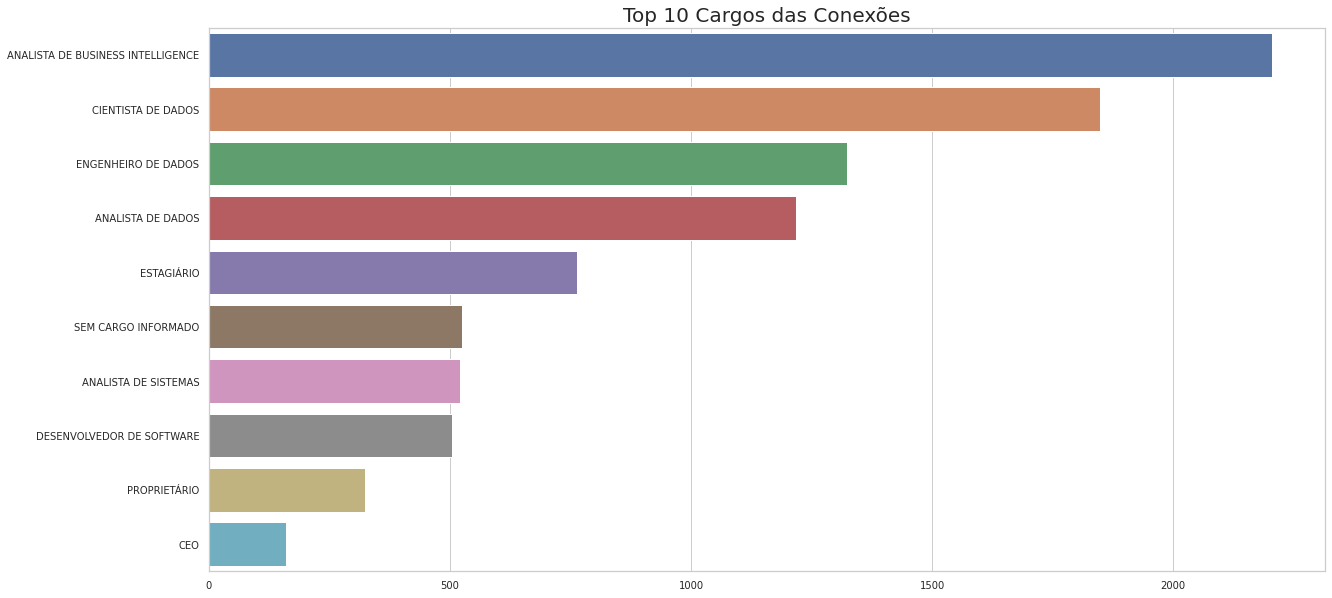

In [161]:
# Gráfico com top 10 cargos das conexões
x = df['Position'].value_counts().head(10).values
y = df['Position'].value_counts().head(10).index
sns.barplot(x=x, y=y)
plt.title('Top 10 Cargos das Conexões')
plt.show()

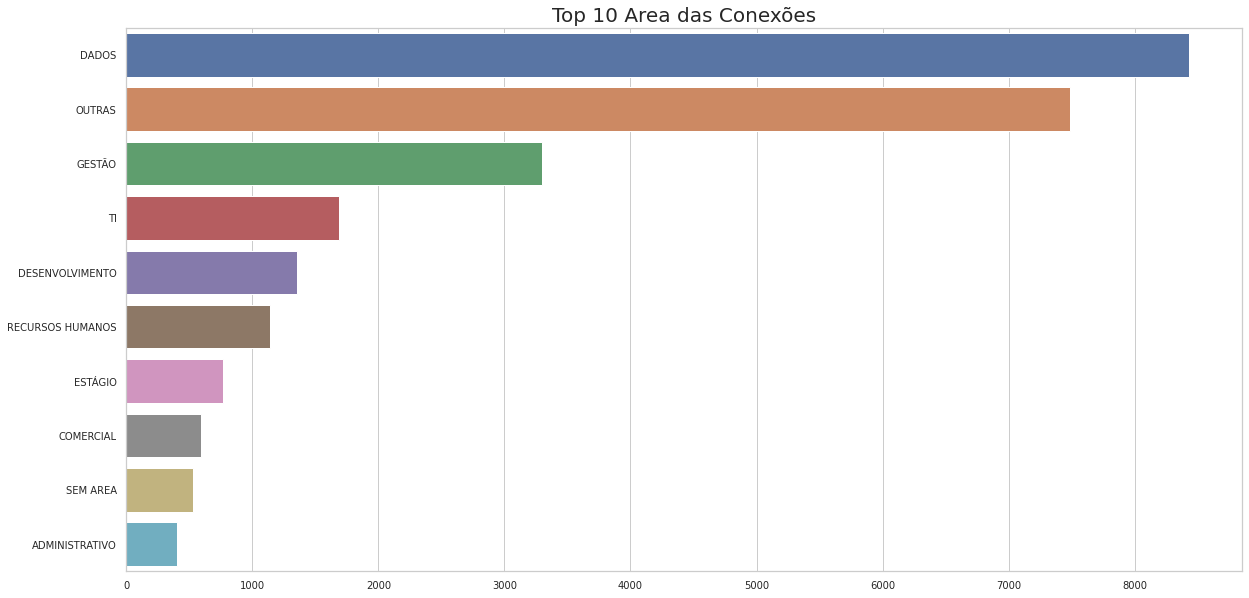

In [162]:
# Gráfico com top 10 area das conexões
x = df['Area'].value_counts().head(10).values
y = df['Area'].value_counts().head(10).index
sns.barplot(x=x, y=y)
plt.title('Top 10 Area das Conexões')
plt.show()

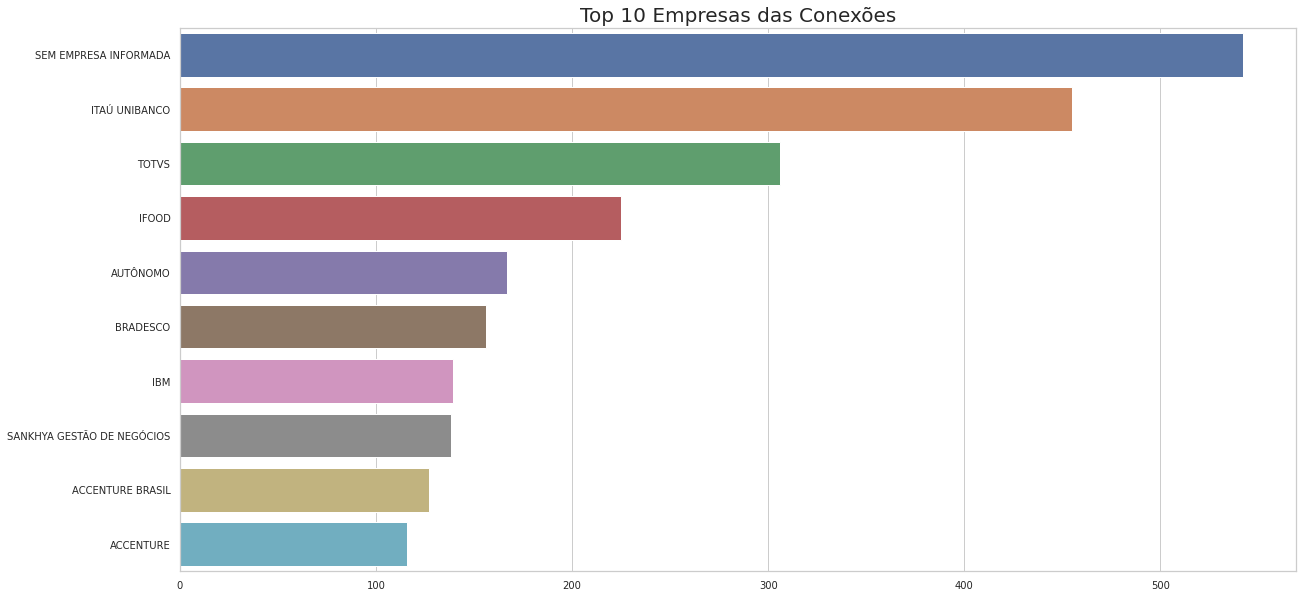

In [163]:
# Gráfico com top 10 empresas das conexões
x = df['Company'].value_counts().head(10).values
y = df['Company'].value_counts().head(10).index
sns.barplot(x=x, y=y)
plt.title('Top 10 Empresas das Conexões')
plt.show()

In [164]:
YearMonth = pd.DataFrame(pd.DataFrame(df['Connected YearMonth'].value_counts())).rename(columns={'Connected YearMonth': 'Conexões'}).sort_index()

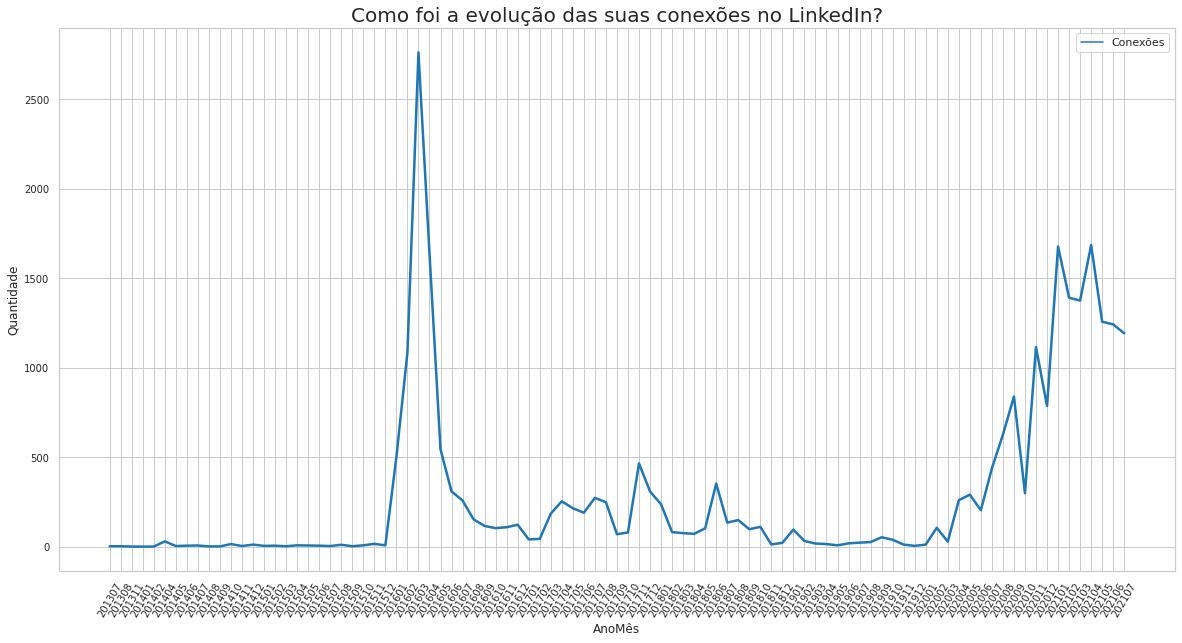

In [165]:
# Gráfico de linha com evolução das conexões
sns.lineplot(data=YearMonth,
             palette="tab10",
             linewidth=2.5,
             estimator='sum')
plt.title('Como foi a evolução das suas conexões no LinkedIn?')
plt.xlabel('AnoMês')
plt.xticks(rotation = 60)
plt.ylabel('Quantidade')
plt.show()

In [166]:
YearMonthArea = pd.DataFrame(pd.DataFrame(df.query('Area == "DADOS"')['Connected YearMonth'].value_counts())).rename(columns={'Connected YearMonth': 'Conexões'}).sort_index()

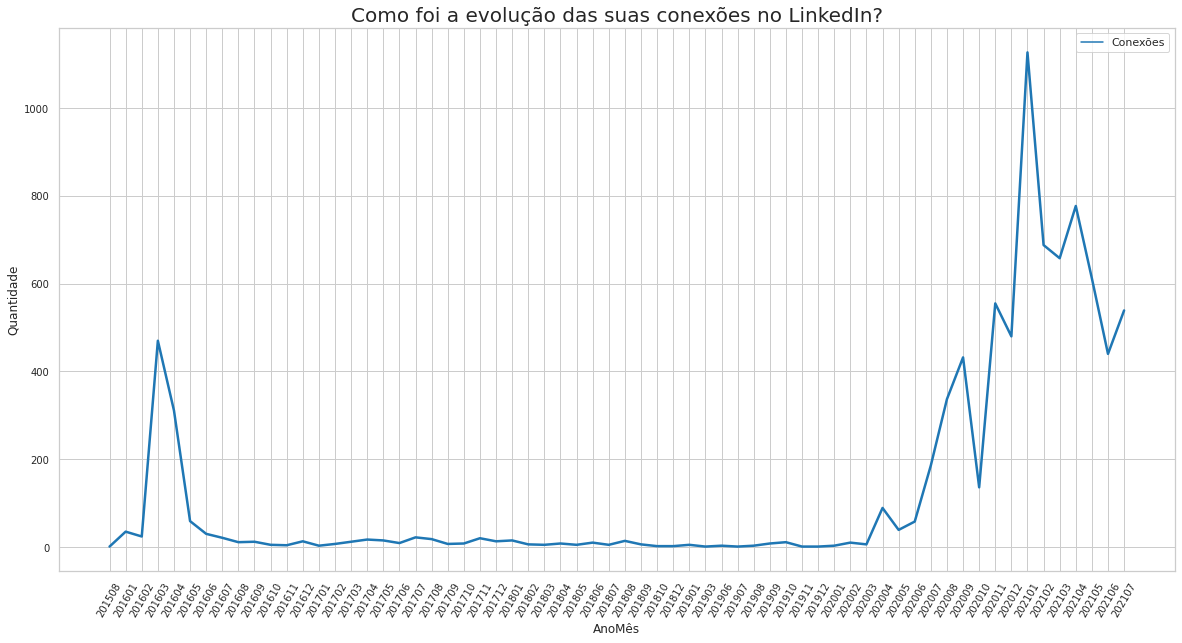

In [167]:
# Gráfico de linha com evolução das conexões
sns.lineplot(data=YearMonthArea,
             palette="tab10",
             linewidth=2.5,
             estimator='sum')
plt.title('Como foi a evolução das suas conexões no LinkedIn?')
plt.xlabel('AnoMês')
plt.xticks(rotation = 60)
plt.ylabel('Quantidade')
plt.show()

In [168]:
YearMonthArea = pd.DataFrame(pd.DataFrame(df.query('Area == "RECURSOS HUMANOS"')['Connected YearMonth'].value_counts())).rename(columns={'Connected YearMonth': 'Conexões'}).sort_index()

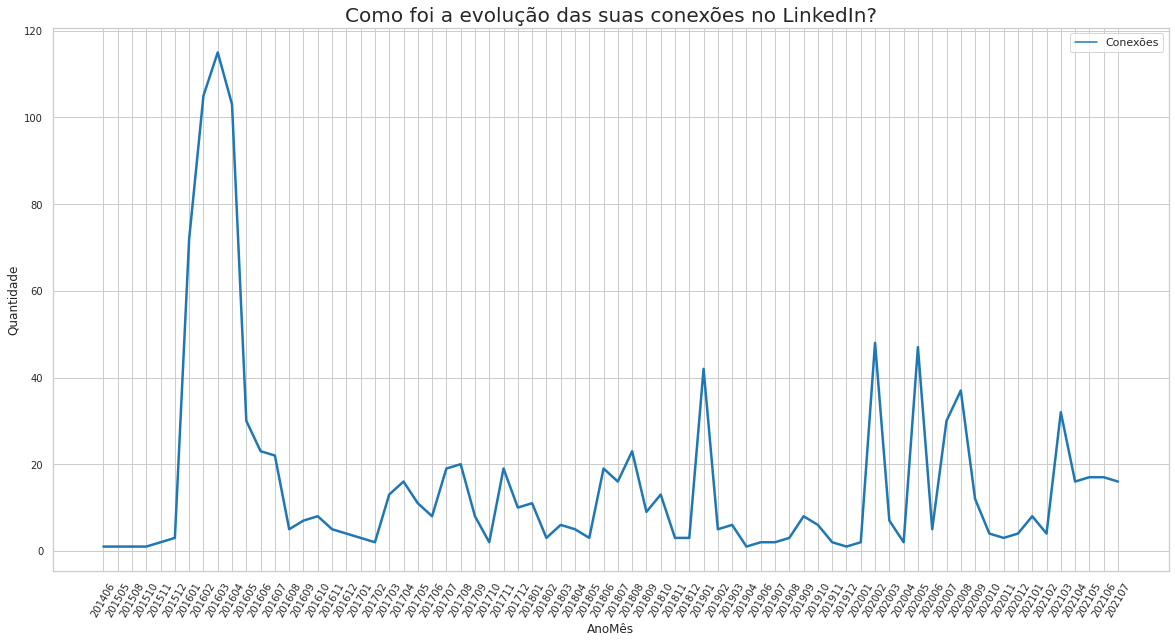

In [169]:
# Gráfico de linha com evolução das conexões
sns.lineplot(data=YearMonthArea,
             palette="tab10",
             linewidth=2.5,
             estimator='sum')
plt.title('Como foi a evolução das suas conexões no LinkedIn?')
plt.xlabel('AnoMês')
plt.xticks(rotation = 60)
plt.ylabel('Quantidade')
plt.show()

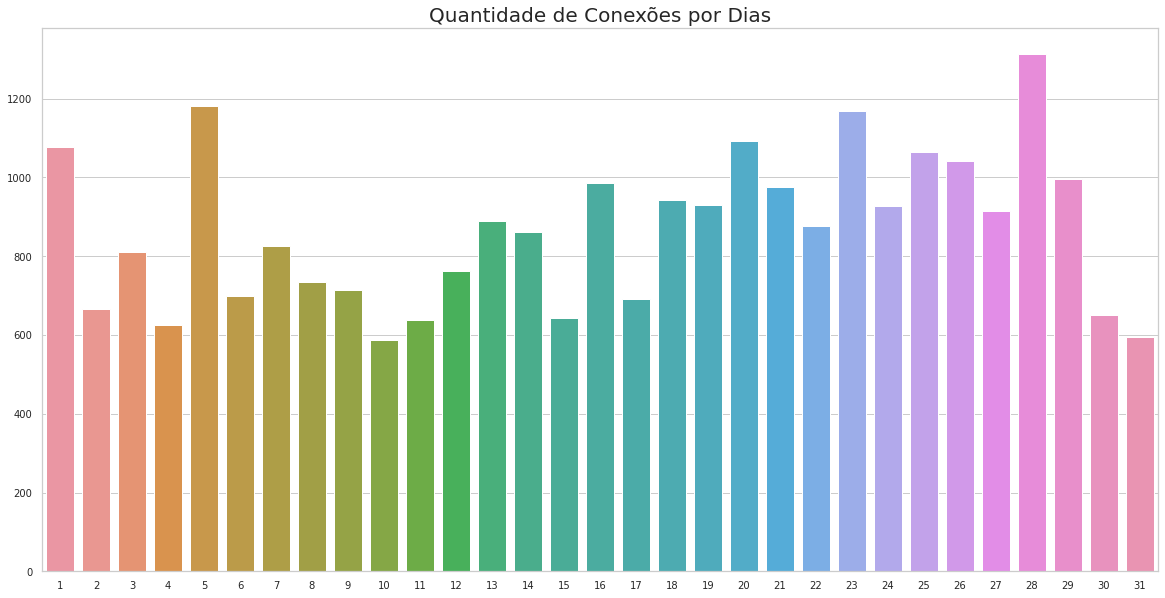

In [170]:
# Gráfico quantidade de conexões por dia
x = df['Connected Day'].value_counts().index
y = df['Connected Day'].value_counts().values
sns.barplot(x=x, y=y)
plt.title('Quantidade de Conexões por Dias')
plt.show()

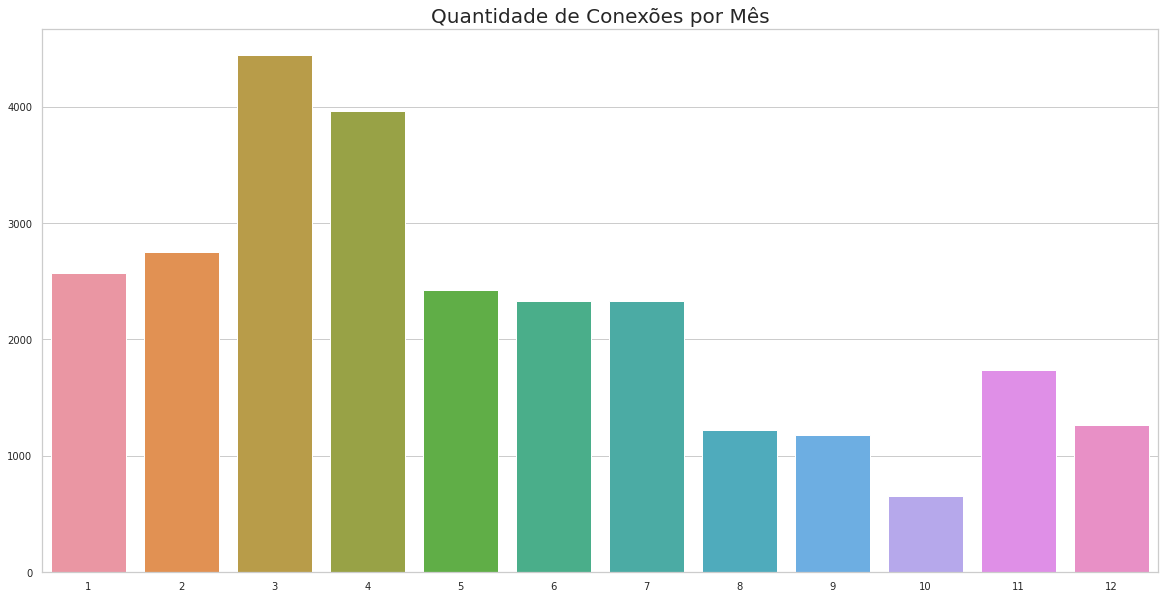

In [171]:
# Gráfico quantidade de conexões por mês
x = df['Connected Month'].value_counts().index
y = df['Connected Month'].value_counts().values
sns.barplot(x=x, y=y)
plt.title('Quantidade de Conexões por Mês')
plt.show()

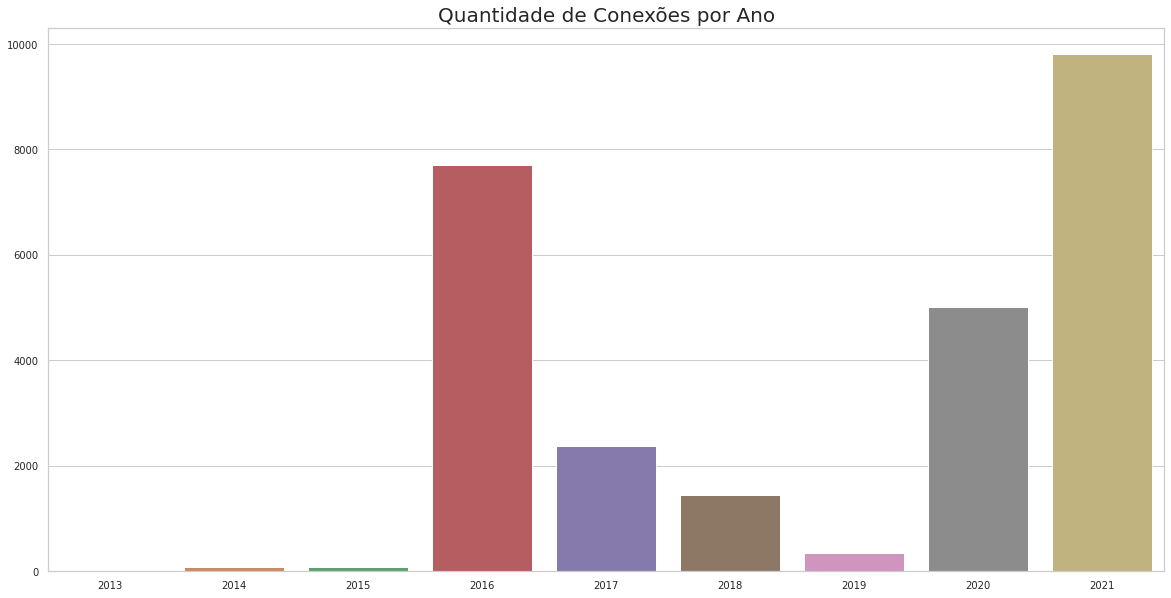

In [172]:
# Gráfico quantidade de conexões por ano
x = df['Connected Year'].value_counts().index
y = df['Connected Year'].value_counts().values
sns.barplot(x=x, y=y)
plt.title('Quantidade de Conexões por Ano')
plt.show()

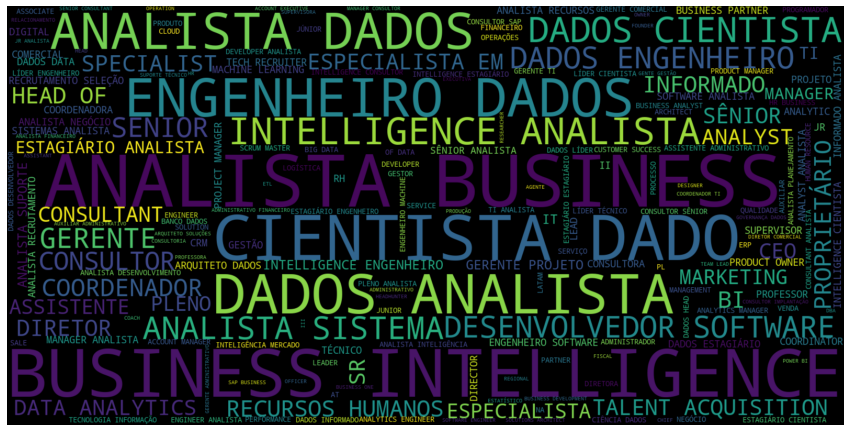

In [173]:
# Gráfico nuvem de palavras com cargos das conexões
todos_itens = ' '.join(s for s in df['Position'].values)
stop_words = ['sem', 'cargo', 'de', 'da', 'do', 'and', 'e', 'in']

# criar uma wordcloud
wc = WordCloud(stopwords=stop_words, background_color="black", width=1600, height=800)
wordcloud = wc.generate(todos_itens)

# plotar wordcloud
fig, ax = plt.subplots(figsize=(15,9))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

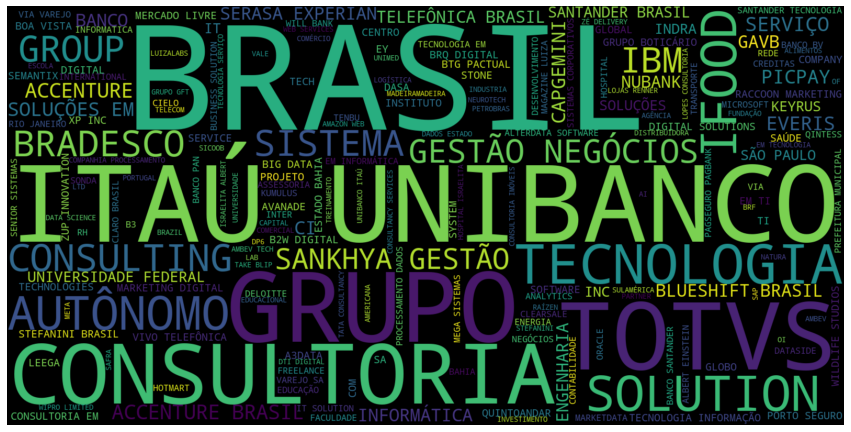

In [174]:
# Gráfico nuvem de palavras com cargos das conexões
todos_itens = ' '.join(s for s in df['Company'].values)
stop_words = ['sem', 'empresa', 'informada', 'ltda', 'de', 'da', 'do', 'and', 'e', 'in']

# criar uma wordcloud
wc = WordCloud(stopwords=stop_words, background_color="black", width=1600, height=800)
wordcloud = wc.generate(todos_itens)

# plotar wordcloud
fig, ax = plt.subplots(figsize=(15,9))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()